In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
data = pd.read_csv('data.csv')

In [13]:
columns = data.columns
len(columns)

20

In [14]:
columns

Index(['Unnamed: 0', 'Episode', 'Station', 'Channel Type', 'Season', 'Year',
       'Date', 'Day of week', 'Start_time', 'End_time', 'Length',
       'Name of show', 'Name of episode', 'Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?', 'Market Share_total',
       'Temperature in Montreal during episode'],
      dtype='object')

In [15]:
for i in range (len(columns)) :
     print(" {}\t{} ".format(columns[i] ,len(data[columns[i]].unique())))     

 Unnamed: 0	616656 
 Episode	6687 
 Station	24 
 Channel Type	2 
 Season	4 
 Year	4 
 Date	877 
 Day of week	7 
 Start_time	138322 
 End_time	138334 
 Length	39 
 Name of show	6687 
 Name of episode	86557 
 Genre	27 
 First time or rerun	2 
 # of episode in the season	2 
 Movie?	2 
 Game of the Canadiens during episode?	2 
 Market Share_total	545 
 Temperature in Montreal during episode	11829 


In [16]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Name of episode,222579,0.360945
Temperature in Montreal during episode,83344,0.135155
Start_time,43,0.000070
End_time,43,0.000070
# of episode in the season,0,0.000000
First time or rerun,0,0.000000
Genre,0,0.000000
Movie?,0,0.000000
Name of show,0,0.000000
Length,0,0.000000


In [17]:
data.drop(columns[0],axis=1,inplace=True)
data.drop('Name of episode', axis=1 , inplace=True)
data.drop('Name of show',axis=1,inplace=True)

In [20]:
data = data.dropna(axis=0)
data.isnull().sum()

Episode                                   0
Station                                   0
Channel Type                              0
Season                                    0
Year                                      0
Date                                      0
Day of week                               0
Start_time                                0
End_time                                  0
Length                                    0
Genre                                     0
First time or rerun                       0
# of episode in the season                0
Movie?                                    0
Game of the Canadiens during episode?     0
Market Share_total                        0
Temperature in Montreal during episode    0
dtype: int64

In [21]:
data

,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Music Video Clips,No,Yes,No,No,0.9,20.400
1,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,News,No,Yes,No,No,1.7,18.125
4,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,Reality Programs,No,Yes,No,No,2.2,18.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616651,Backstage : Les coulisses du succès,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 08:00:00,2019-01-22 08:30:00,2,Ongoing Dramatic Series,No,Yes,No,No,0.0,-22.375
616652,Le Studio,VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 08:30:00,2019-01-22 09:00:00,2,Ongoing Dramatic Series,No,Yes,No,No,1.1,-22.375
616653,Jane l'Immaculée (M),VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 09:00:00,2019-01-22 10:00:00,4,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,0.3,-22.525
616654,Jane l'Immaculée (M),VRAK+,Specialty Channel,Winter,2019,2019-01-22,Tuesday,2019-01-22 10:00:00,2019-01-22 11:00:00,4,Ongoing Comedy Series (Sitcoms),No,Yes,No,No,0.4,-22.775


In [22]:
columns = data.columns
len(columns)

17

c:\users\parastoo\pycharmprojects\yapaitek\venv\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


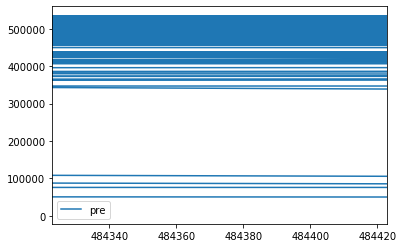

In [31]:
# temp1 = data [columns[16]]
# temp1 = temp1.map(generate_index(temp1))
# 
# temp2= data[ columns[15]]
# temp2 = temp2.map(generate_index(temp2))
# 
# fig, ax = plt.subplots()
# ax.plot(temp1,temp2, label="pre")
# ax.legend()
# import random as rnd
# randomStartIndex = rnd.randrange(1,len(data) - 101)
# plt.xlim(randomStartIndex, randomStartIndex + 100 )
# plt.show()